# EDA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


**Data** **Loading**

In [ ]:


# Load the datasets
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

train['is_train'] = 1  # Flagging training data
test['is_train'] = 0    # Flagging testing data
data= pd.concat([train, test], ignore_index=True)


train.head(50)



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,is_train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000,1
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000,1
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,1
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900,1
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2008,WD,Normal,118000,1


**Data Understanding**

In [ ]:
features = data[['LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                 'TotRmsAbvGrd', 'GarageArea',
                  'PoolArea', 'FullBath', 'HalfBath','BsmtFullBath','BsmtHalfBath','LotFrontage']]



# Get basic information about the dataset
features.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       2919 non-null   int64  
 1   GrLivArea     2919 non-null   int64  
 2   TotalBsmtSF   2918 non-null   float64
 3   1stFlrSF      2919 non-null   int64  
 4   2ndFlrSF      2919 non-null   int64  
 5   TotRmsAbvGrd  2919 non-null   int64  
 6   GarageArea    2918 non-null   float64
 7   PoolArea      2919 non-null   int64  
 8   FullBath      2919 non-null   int64  
 9   HalfBath      2919 non-null   int64  
 10  BsmtFullBath  2919 non-null   float64
 11  BsmtHalfBath  2919 non-null   float64
 12  LotFrontage   2433 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 296.6 KB


In [ ]:

# Check the statistics of numerical features
print(features.describe())

             LotArea    GrLivArea  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count    2919.000000  2919.000000  2918.000000  2919.000000  2919.000000   
mean    10168.114080  1500.759849  1051.777587  1159.581706   336.483727   
std      7886.996359   506.051045   440.766258   392.362079   428.701456   
min      1300.000000   334.000000     0.000000   334.000000     0.000000   
25%      7478.000000  1126.000000   793.000000   876.000000     0.000000   
50%      9453.000000  1444.000000   989.500000  1082.000000     0.000000   
75%     11570.000000  1743.500000  1302.000000  1387.500000   704.000000   
max    215245.000000  5642.000000  6110.000000  5095.000000  2065.000000   

       TotRmsAbvGrd   GarageArea     PoolArea     FullBath     HalfBath  \
count   2919.000000  2918.000000  2919.000000  2919.000000  2919.000000   
mean       6.451524   472.874572     2.251799     1.568003     0.380267   
std        1.569379   215.394815    35.663946     0.552969     0.502872   
min        2.00

Null Values Checking

In [ ]:
null_values = features.isnull().sum()
null_values = null_values[null_values > 0]
print(null_values)

TotalBsmtSF     1
GarageArea      1
BsmtFullBath    2
BsmtHalfBath    2
dtype: int64


In [ ]:
print(data[['BsmtFullBath', 'BsmtHalfBath']].describe())


       BsmtFullBath  BsmtHalfBath
count   2917.000000   2917.000000
mean       0.429894      0.061364
std        0.524736      0.245687
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        1.000000      0.000000
max        3.000000      2.000000


Imputation

In [ ]:
# Impute the missing value in TotalBsmtSF with the median (989.5)
data['BsmtFullBath'].fillna(data['BsmtFullBath'].median(), inplace=True)

# Impute the missing value in GarageArea with the median (480)
data['BsmtHalfBath'].fillna(data['BsmtHalfBath'].median(), inplace=True)




<ipython-input-7-ade931a6646d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['BsmtFullBath'].fillna(data['BsmtFullBath'].median(), inplace=True)
<ipython-input-7-ade931a6646d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [ ]:
# Confirm there are no more missing values
print(data[['BsmtHalfBath', 'BsmtFullBath']].isnull().sum())

BsmtHalfBath    0
BsmtFullBath    0
dtype: int64


Plots for better Understanding

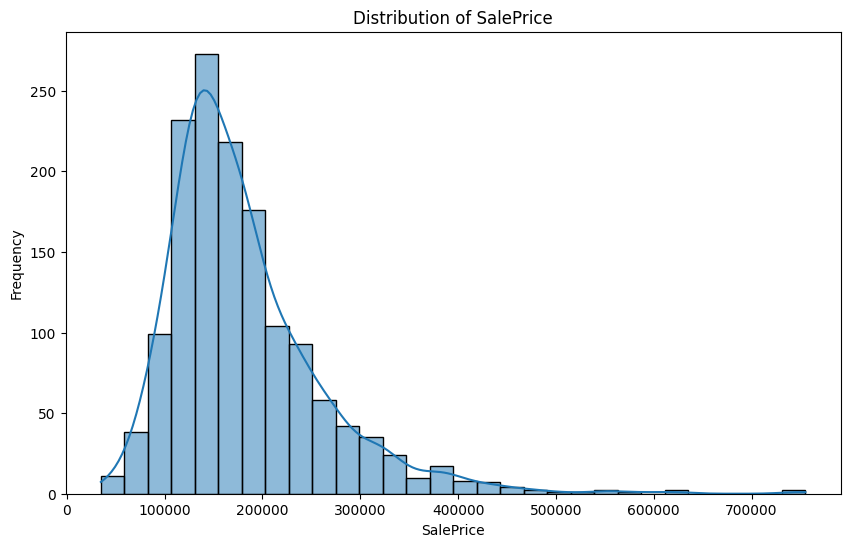

Skewness of SalePrice: 1.8828757597682129


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Checking skewness
print(f"Skewness of SalePrice: {data['SalePrice'].skew()}")


ValueError: num must be an integer with 1 <= num <= 9, not 10

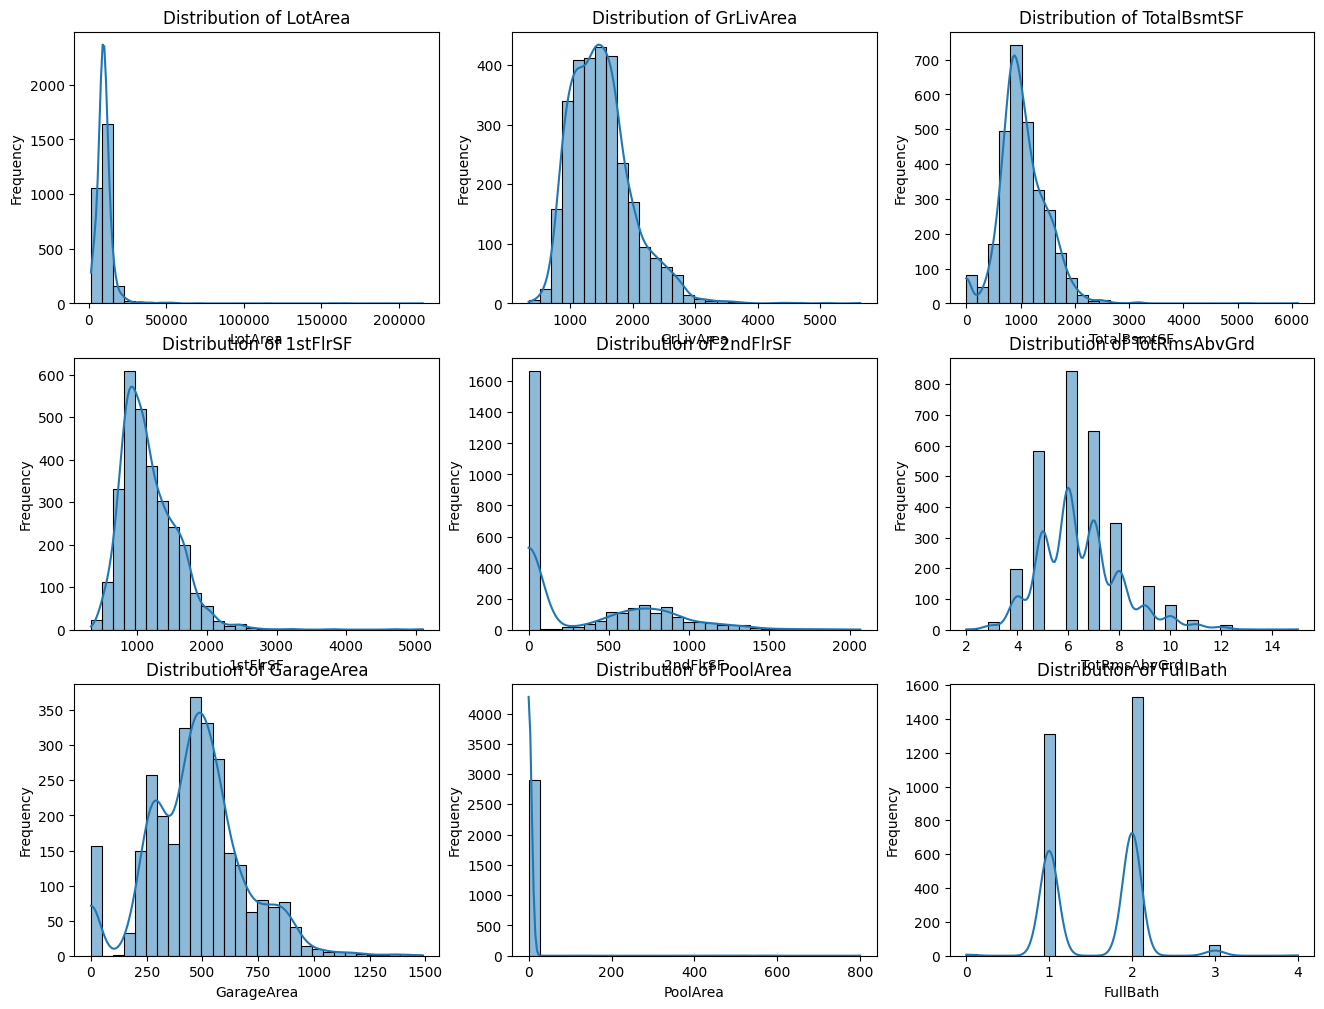

In [ ]:

plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**Feature selection** **And Engineering**

LotArea: Lot size in square feet.

GrLivArea: Above grade living area square feet.

TotalBsmtSF: Total square feet of basement area.

1stFlrSF: First-floor square feet.

2ndFlrSF: Second-floor square feet.

TotRmsAbvGrd: Total rooms above grade.

GarageArea: Size of the garage in square feet.

PoolArea: Pool area in square feet.

TotRmsAbvGrd: Number of bedrooms.

TotalBath: Calculated from full and half bathrooms .


In [ ]:
# Creating the TotalBath feature
data['TotalBath'] = data['FullBath'] + 0.5 * data['HalfBath'] + data['BsmtFullBath'] + 0.5 * data['BsmtHalfBath']


In [ ]:
features = data[['LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                 'TotRmsAbvGrd', 'GarageArea'
                 ,'PoolArea', 'TotalBath','FullBath', 'HalfBath','BsmtFullBath','BsmtHalfBath']]

target = data['SalePrice']

In [ ]:
# Create the 'Has2ndFlr' binary feature (1 = house has a second floor, 0 = no second floor)
features['Has2ndFlr'] = (features['2ndFlrSF'] > 0).astype(int)

# Keep the '2ndFlrSF' to account for the size of the second floor
print(features[['2ndFlrSF', 'Has2ndFlr']].head())
# Create the 'Has2ndFlr' binary feature (1 = house has a second floor, 0 = no second floor)
features['Has1stFlr'] = (features['1stFlrSF'] > 0).astype(int)

# Keep the '2ndFlrSF' to account for the size of the second floor
print(features[['1stFlrSF', 'Has1stFlr']].head())

   2ndFlrSF  Has2ndFlr
0       854          1
1         0          0
2       866          1
3       756          1
4      1053          1
   1stFlrSF  Has1stFlr
0       856          1
1      1262          1
2       920          1
3       961          1
4      1145          1


<ipython-input-13-73bf3dbe21c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Has2ndFlr'] = (features['2ndFlrSF'] > 0).astype(int)
<ipython-input-13-73bf3dbe21c8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Has1stFlr'] = (features['1stFlrSF'] > 0).astype(int)


In [ ]:

# create a Total Property Square Footage to include garage
features['TotalPropertySF'] = (
    features['GrLivArea'] +
    features['GarageArea'] +
    features['PoolArea']
)

# Display the first few rows to check the new features
print(features[['1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'GarageArea',
             'PoolArea',
             'TotalPropertySF']].head())


   1stFlrSF  2ndFlrSF  TotalBsmtSF  GarageArea  PoolArea  TotalPropertySF
0       856       854        856.0       548.0         0           2258.0
1      1262         0       1262.0       460.0         0           1722.0
2       920       866        920.0       608.0         0           2394.0
3       961       756        756.0       642.0         0           2359.0
4      1145      1053       1145.0       836.0         0           3034.0


<ipython-input-14-43c407cd56c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['TotalPropertySF'] = (


In [ ]:
# Assuming 'data' is your DataFrame containing the housing dataset
for column in features.columns:
    print(f"Unique values for '{column}':")
    if features[column].dtype == 'object':
        print(features[column].value_counts())
    else:
        unique_values = features[column].unique()
        unique_count = features[column].nunique()
        print(f"Unique count: {unique_count}")
        print(f"Unique values: {unique_values[:10]}...")  # Show the first 10 unique values
    print("\n" + "-"*50 + "\n")  # Separator for clarity


Unique values for 'LotArea':
Unique count: 1951
Unique values: [ 8450  9600 11250  9550 14260 14115 10084 10382  6120  7420]...

--------------------------------------------------

Unique values for 'GrLivArea':
Unique count: 1292
Unique values: [1710 1262 1786 1717 2198 1362 1694 2090 1774 1077]...

--------------------------------------------------

Unique values for 'TotalBsmtSF':
Unique count: 1058
Unique values: [ 856. 1262.  920.  756. 1145.  796. 1686. 1107.  952.  991.]...

--------------------------------------------------

Unique values for '1stFlrSF':
Unique count: 1083
Unique values: [ 856 1262  920  961 1145  796 1694 1107 1022 1077]...

--------------------------------------------------

Unique values for '2ndFlrSF':
Unique count: 635
Unique values: [ 854    0  866  756 1053  566  983  752 1142 1218]...

--------------------------------------------------

Unique values for 'TotRmsAbvGrd':
Unique count: 14
Unique values: [ 8  6  7  9  5 11  4 10 12  3]...

----------------

In [ ]:
# Create the 'PoolArea' binary feature (1 = house has a pool, 0 = no )
features['HASPOOL'] = (features['PoolArea'] > 0).astype(int)

# Keep the '2ndFlrSF' to account for the size of the second floor
print(features[['2ndFlrSF', 'HASPOOL']].head())

   2ndFlrSF  HASPOOL
0       854        0
1         0        0
2       866        0
3       756        0
4      1053        0


<ipython-input-16-b22a7e101377>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['HASPOOL'] = (features['PoolArea'] > 0).astype(int)


In [ ]:
#GarageArea


features['HASGarageArea'] = (features['GarageArea'] > 0).astype(int)


print(features[['HASGarageArea', 'GarageArea']].head())

   HASGarageArea  GarageArea
0              1       548.0
1              1       460.0
2              1       608.0
3              1       642.0
4              1       836.0


<ipython-input-17-336d90c446d9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['HASGarageArea'] = (features['GarageArea'] > 0).astype(int)


Plot for detecting outliers

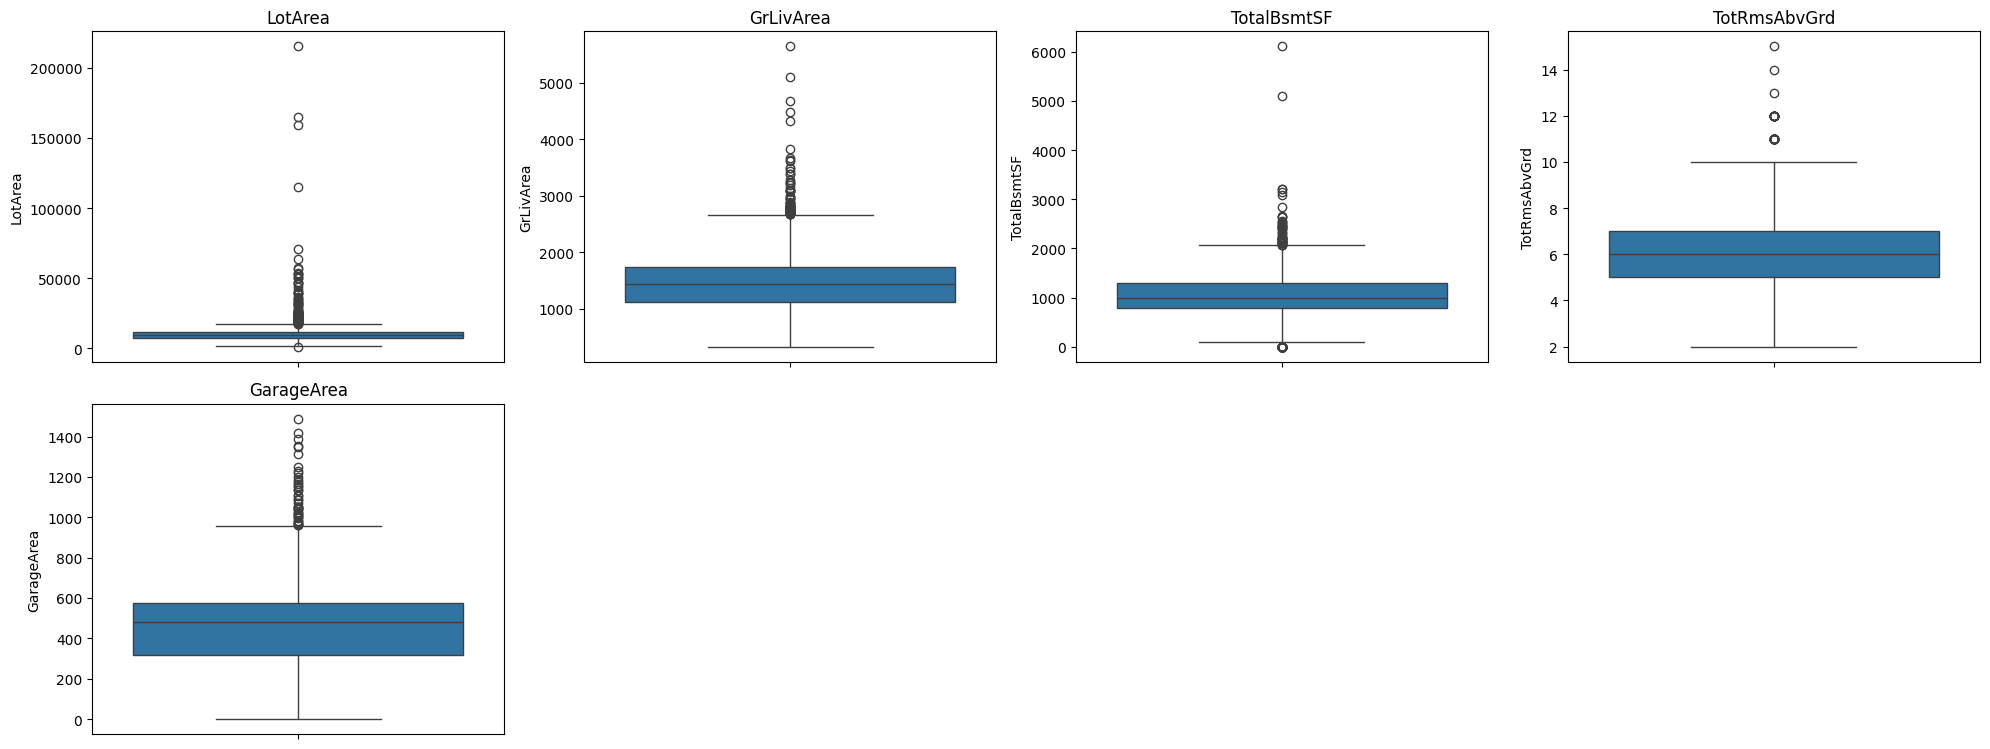

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt


features_to_plot = [
    'LotArea', 'GrLivArea', 'TotalBsmtSF',
    'TotRmsAbvGrd', 'GarageArea'

]

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Create box plots for each feature
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(4, 4, i)  # 4 rows, 4 columns
    sns.boxplot(data=features[feature])
    plt.title(feature)

plt.tight_layout()
plt.show()


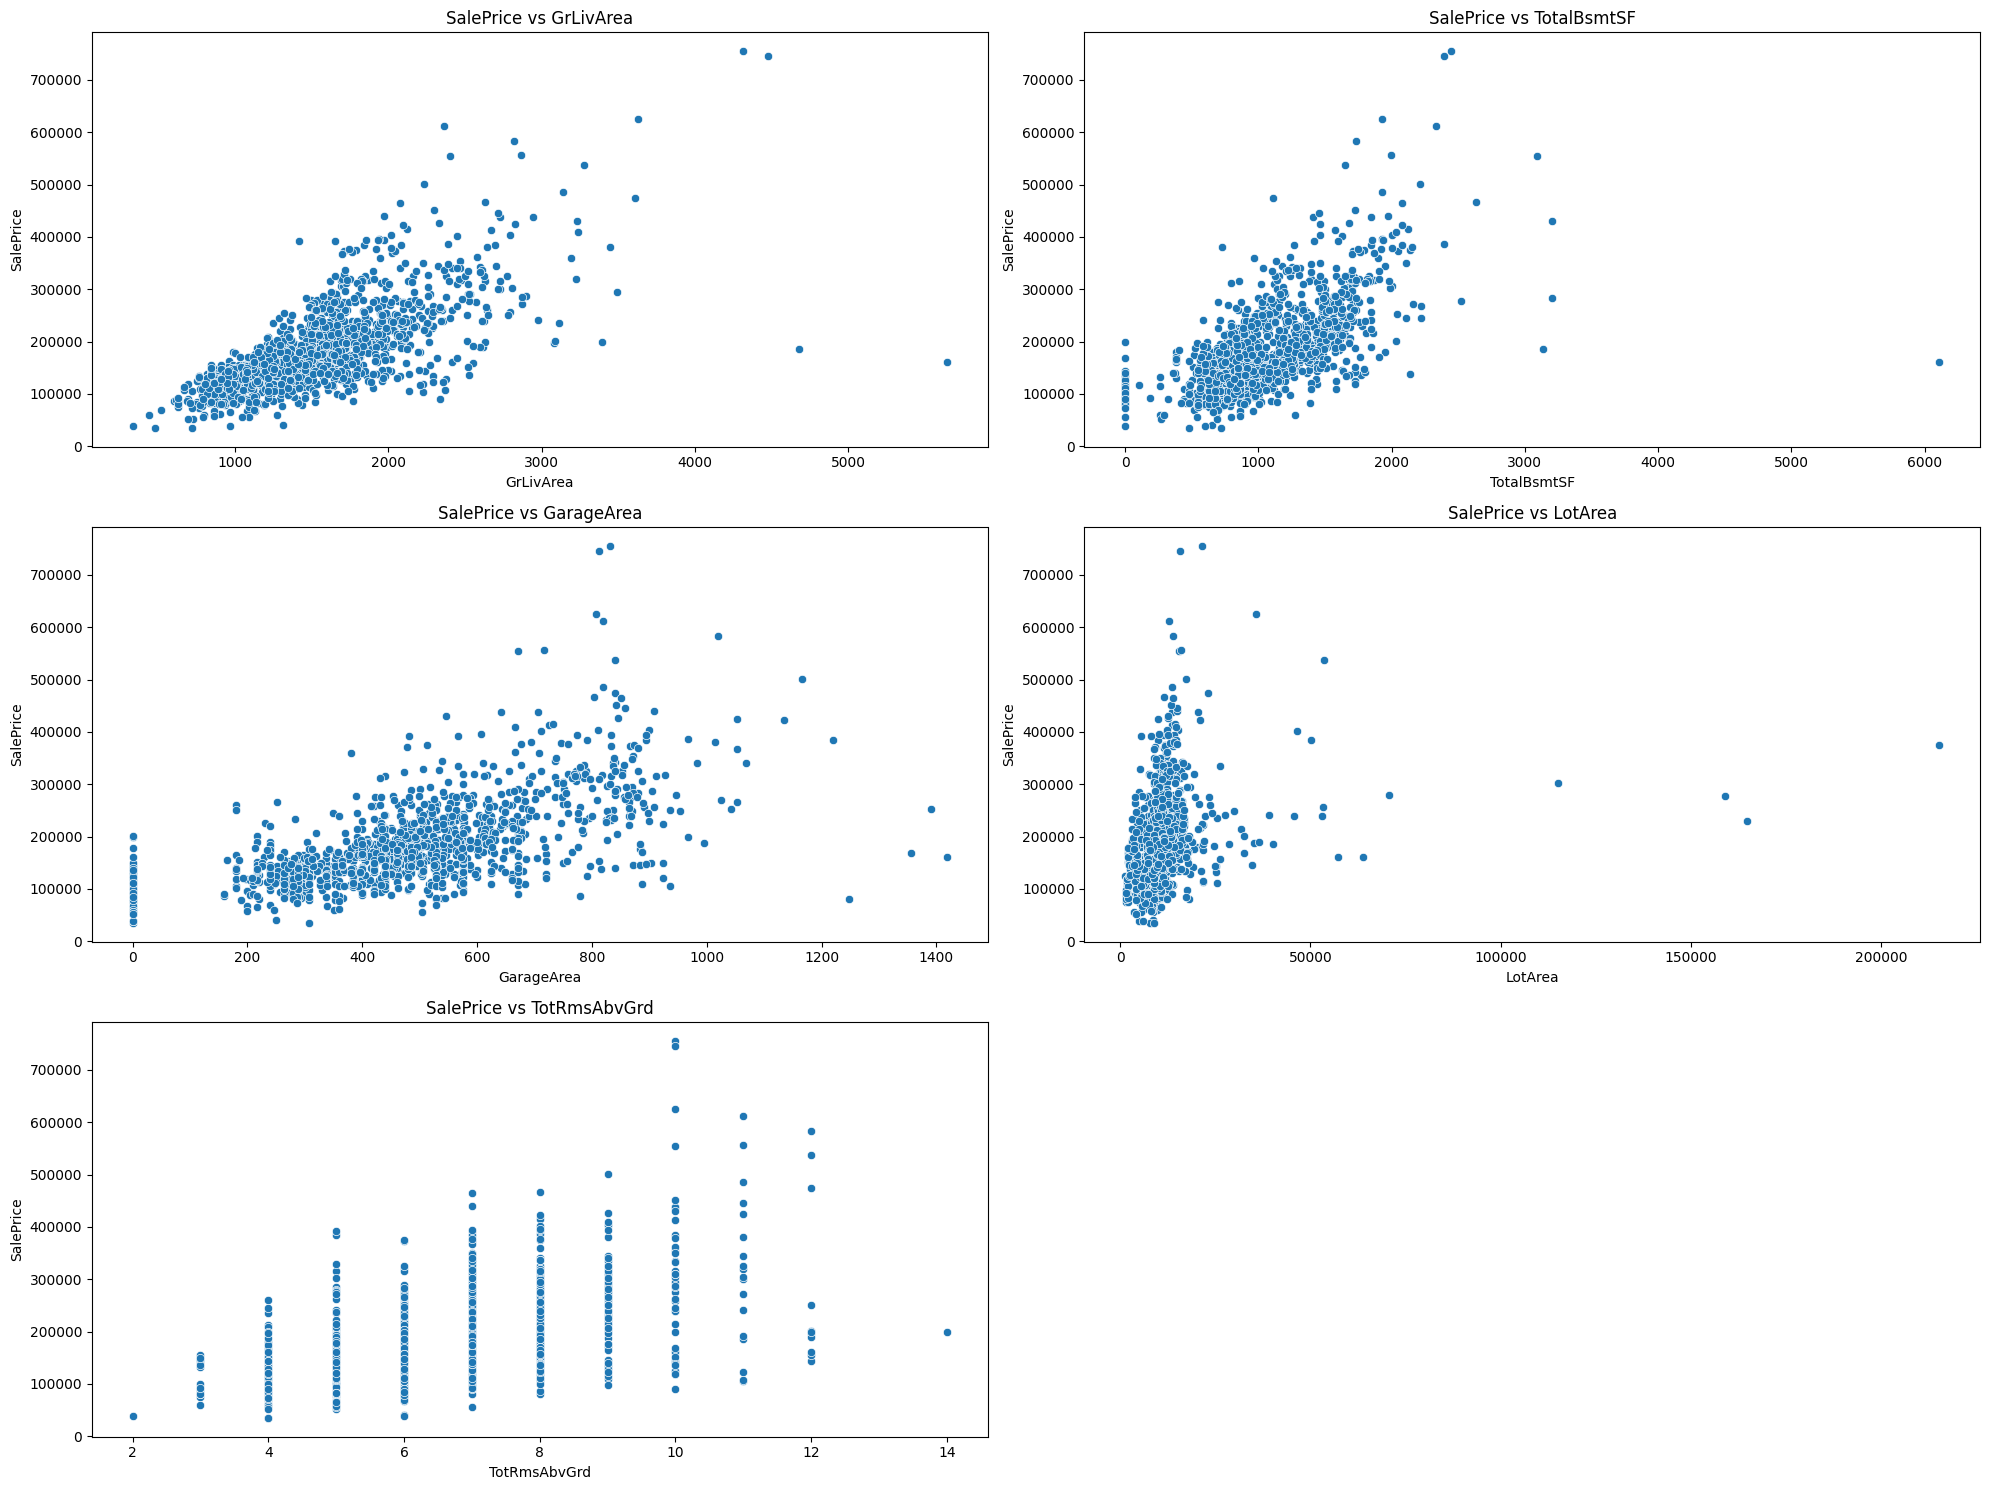

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'features' is your DataFrame that includes 'SalePrice' and the other relevant features.
# Features to visualize against SalePrice
scatter_features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'LotArea', 'TotRmsAbvGrd']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Create scatter plots for each feature against SalePrice
for i, feature in enumerate(scatter_features, 1):
    plt.subplot(3, 2, i)  # 3 rows, 2 columns
    sns.scatterplot(data=features, x=feature, y=target)
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Assuming 'features' is your DataFrame containing the relevant features.
features_to_plot = [
    'LotArea', 'GrLivArea', 'TotalBsmtSF',
    'TotRmsAbvGrd', 'GarageArea'
]

# Function to remove outliers based on the IQR method and print bounds
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers

    # Print bounds for inspection
    print(f"{column} - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

    # Count the number of outliers before removal
    outliers_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

    # Filter out the outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered, outliers_count

# Store the original shape
original_shape = features.shape

# Remove outliers for each specified feature and accumulate the number of removed outliers
total_removed = 0
for feature in features_to_plot:
    features, removed = remove_outliers_iqr(features, feature)
    total_removed += removed

# Display results
print("Original DataFrame shape:", original_shape)
print("New DataFrame shape after removing outliers:", features.shape)
print("Total rows removed:", total_removed)

# Check the min and max values for each feature
for feature in features_to_plot:
    print(f"{feature} - Min: {features[feature].min()}, Max: {features[feature].max()}")


LotArea - Q1: 7478.0, Q3: 11570.0, IQR: 4092.0, Lower Bound: 1340.0, Upper Bound: 17708.0
GrLivArea - Q1: 1114.0, Q3: 1728.0, IQR: 614.0, Lower Bound: 193.0, Upper Bound: 2649.0
TotalBsmtSF - Q1: 783.75, Q3: 1257.0, IQR: 473.25, Lower Bound: 73.875, Upper Bound: 1966.875
TotRmsAbvGrd - Q1: 5.0, Q3: 7.0, IQR: 2.0, Lower Bound: 2.0, Upper Bound: 10.0
GarageArea - Q1: 311.5, Q3: 574.5, IQR: 263.0, Lower Bound: -83.0, Upper Bound: 969.0
Original DataFrame shape: (2919, 18)
New DataFrame shape after removing outliers: (2570, 18)
Total rows removed: 347
LotArea - Min: 1470, Max: 17671
GrLivArea - Min: 407, Max: 2649
TotalBsmtSF - Min: 105.0, Max: 1964.0
TotRmsAbvGrd - Min: 3, Max: 10
GarageArea - Min: 0.0, Max: 963.0


In [ ]:
final_features= features[['LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                 'TotRmsAbvGrd', 'GarageArea'
                 ,'PoolArea', 'TotalBath','FullBath', 'HalfBath','BsmtFullBath','BsmtHalfBath','TotalPropertySF' , 'Has1stFlr' , 'Has2ndFlr']]


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler  # or MinMaxScaler

# Sample features DataFrame
# Assuming 'features' is your existing DataFrame

# Define the continuous features to scale
continuous_features = [
    'LotArea', 'GrLivArea', 'TotalBsmtSF',
    'GarageArea','PoolArea'
]

# Initialize the scaler
scaler = StandardScaler()  # Change to MinMaxScaler() if preferred

# Scale the selected continuous features
features[continuous_features] = scaler.fit_transform(features[continuous_features])

# Show the scaled features
print(features[continuous_features].describe())


            LotArea     GrLivArea   TotalBsmtSF    GarageArea      PoolArea
count  2.570000e+03  2.570000e+03  2.570000e+03  2.570000e+03  2.570000e+03
mean  -5.805991e-17 -1.050608e-16 -8.847225e-17  6.911894e-19  2.764758e-18
std    1.000195e+00  1.000195e+00  1.000195e+00  1.000195e+00  1.000195e+00
min   -2.366376e+00 -2.503437e+00 -2.719027e+00 -2.315486e+00 -3.821001e-02
25%   -5.739967e-01 -7.936950e-01 -6.914234e-01 -7.340317e-01 -3.821001e-02
50%    2.878085e-02 -6.410673e-02 -1.661832e-01  6.500543e-02 -3.821001e-02
75%    6.013726e-01  6.329325e-01  6.231443e-01  6.096291e-01 -3.821001e-02
max    2.701397e+00  3.004094e+00  2.735842e+00  2.609139e+00  3.280450e+01


**Encoding**

In [ ]:
import pandas as pd

# Convert specified features to categorical data type
categorical_features = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']

for feature in categorical_features:
    features[feature] = features[feature].astype('category')

# Display the DataFrame's dtypes to confirm conversion
print(features[categorical_features].dtypes)

# Show unique values for confirmation
print("Unique values after converting to categorical:")
for feature in categorical_features:
    print(f"{feature}: {features[feature].unique()}")


FullBath        category
HalfBath        category
BsmtFullBath    category
BsmtHalfBath    category
dtype: object
Unique values after converting to categorical:
FullBath: [2, 1, 3, 0, 4]
Categories (5, int64): [0, 1, 2, 3, 4]
HalfBath: [1, 0, 2]
Categories (3, int64): [0, 1, 2]
BsmtFullBath: [1.0, 0.0, 2.0, 3.0]
Categories (4, float64): [0.0, 1.0, 2.0, 3.0]
BsmtHalfBath: [0.0, 1.0, 2.0]
Categories (3, float64): [0.0, 1.0, 2.0]


In [ ]:
# One-hot encoding for nominal features
features_encoded = pd.get_dummies(features, drop_first=True)

# Display the new DataFrame shape
print(f"Original DataFrame shape: {features.shape}")
print(f"Encoded DataFrame shape: {features_encoded.shape}")

Original DataFrame shape: (2570, 18)
Encoded DataFrame shape: (2570, 25)


In [ ]:
# Display the first few rows of the encoded DataFrame
print(features_encoded.head())


    LotArea  GrLivArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  TotRmsAbvGrd  \
0 -0.182989   0.697416    -0.515365       856       854             8   
1  0.176738  -0.403107     0.675962      1262         0             6   
2  0.692868   0.884112    -0.327570       920       866             6   
3  0.161098   0.714612    -0.808795       961       756             7   
4  1.634415   1.896201     0.332648      1145      1053             9   

   GarageArea  PoolArea  TotalBath  Has2ndFlr  ...  FullBath_2  FullBath_3  \
0    0.486897  -0.03821        3.5          1  ...        True       False   
1    0.036879  -0.03821        2.5          0  ...        True       False   
2    0.793727  -0.03821        3.5          1  ...        True       False   
3    0.967598  -0.03821        2.0          1  ...       False       False   
4    1.959682  -0.03821        3.5          1  ...        True       False   

   FullBath_4  HalfBath_1  HalfBath_2  BsmtFullBath_1.0  BsmtFullBath_2.0  \
0       False  

In [ ]:
# Display the column names of the DataFrame
column_names = features_encoded.columns.tolist()
print(column_names)


['LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'GarageArea', 'PoolArea', 'TotalBath', 'Has2ndFlr', 'Has1stFlr', 'TotalPropertySF', 'HASPOOL', 'HASGarageArea', 'FullBath_1', 'FullBath_2', 'FullBath_3', 'FullBath_4', 'HalfBath_1', 'HalfBath_2', 'BsmtFullBath_1.0', 'BsmtFullBath_2.0', 'BsmtFullBath_3.0', 'BsmtHalfBath_1.0', 'BsmtHalfBath_2.0']


**Correlations**

In [ ]:
final_features=  features_encoded[['LotArea', 'GrLivArea', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'TotRmsAbvGrd', 'GarageArea',  'TotalBath', 'Has2ndFlr', 'Has1stFlr', 'TotalPropertySF',  'HASGarageArea', 'FullBath_1', 'FullBath_2', 'FullBath_3', 'FullBath_4', 'HalfBath_1', 'HalfBath_2', 'BsmtFullBath_1.0', 'BsmtFullBath_2.0', 'BsmtFullBath_3.0', 'BsmtHalfBath_1.0', 'BsmtHalfBath_2.0']]


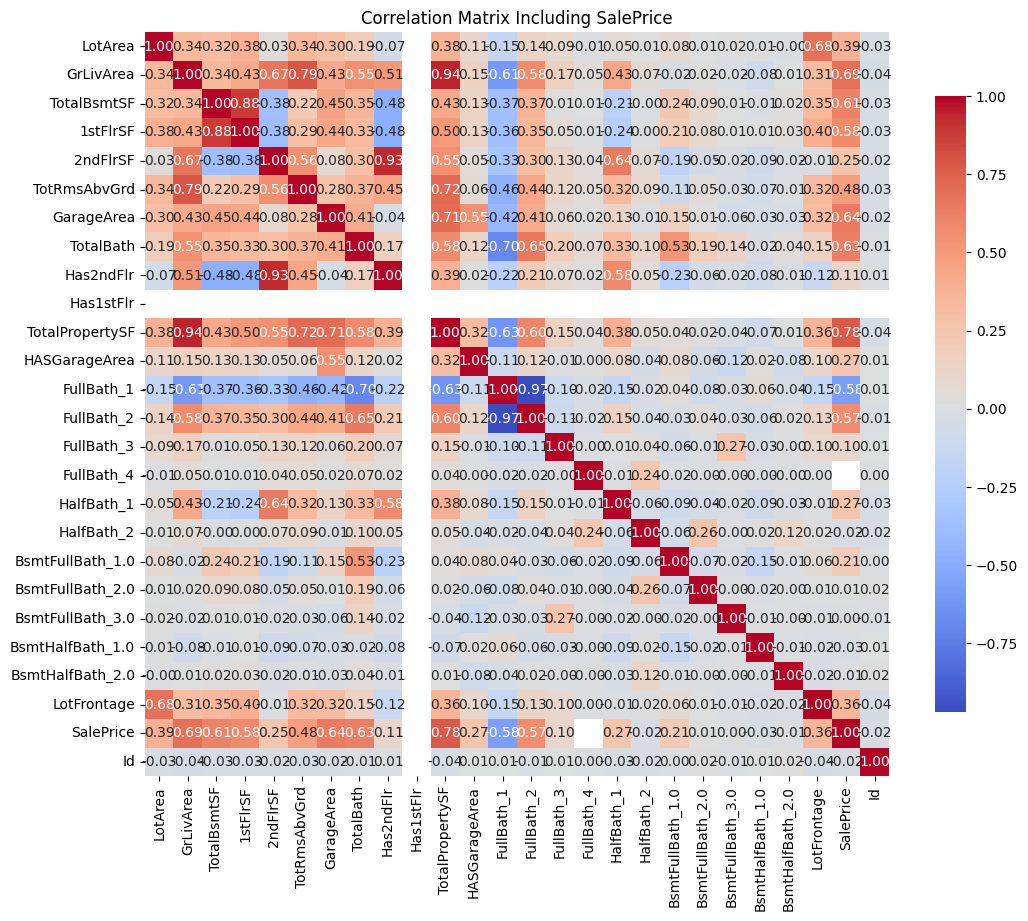

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

final_features['SalePrice'] = data['SalePrice']
final_features['Id'] = data['Id']

# Now calculate the correlation matrix
correlation_matrix = final_features.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Including SalePrice')
plt.show()


In [ ]:
final_features['is_train'] = data['is_train']


In [ ]:

correlation_matrix = final_features.corr()

# Get correlations with SalePrice
saleprice_corr = correlation_matrix['SalePrice']

# Filter for strong positive and negative correlations
strong_correlations = saleprice_corr[(saleprice_corr > 0.39) | (saleprice_corr < -0.3)]

# Display the results
print("Strong correlations with SalePrice:")
print(strong_correlations)




Strong correlations with SalePrice:
GrLivArea          0.686115
TotalBsmtSF        0.607867
1stFlrSF           0.583017
TotRmsAbvGrd       0.484691
GarageArea         0.640208
TotalBath          0.625455
TotalPropertySF    0.775416
FullBath_1        -0.577739
FullBath_2         0.566873
SalePrice          1.000000
Name: SalePrice, dtype: float64


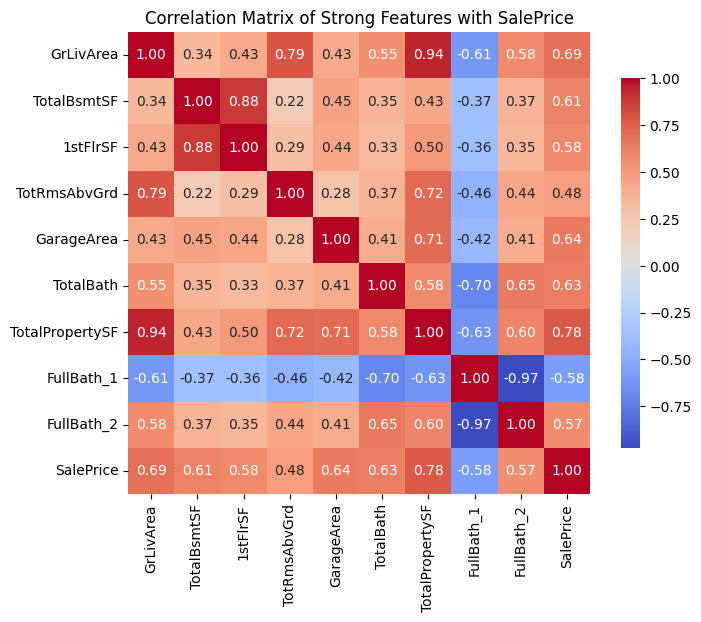

In [ ]:

# Select only the strong correlations with SalePrice
strong_features = strong_correlations.index.tolist()
# strong_features.append('SalePrice')  # Include SalePrice

# Create a new correlation matrix for the selected strong features
strong_corr_matrix = correlation_matrix.loc[strong_features, strong_features]

# Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(strong_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Strong Features with SalePrice')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer

feature_columns = ['TotalBath','TotalPropertySF','TotRmsAbvGrd','1stFlrSF','LotArea' ]
target_column = 'SalePrice'

# Step 2: Split the combined dataset into training and test sets
train = final_features[final_features['is_train'] == 1]
test = final_features[final_features['is_train'] == 0]

# Step 3: Further split the training data into a training set and a validation set
X = train[feature_columns]
y = train[target_column]

# Step 4: Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions on the validation set
y_val_pred = model.predict(X_val)

# Step 7: Evaluate the model
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r_squared = r2_score(y_val, y_val_pred)

# Print evaluation metrics
print(f'Validation RMSE: {rmse}')
print(f'Validation R-squared: {r_squared}')

# Step 8: Make predictions on the test set
X_test = test[feature_columns]
y_test_pred = model.predict(X_test)

Validation RMSE: 34475.277066299015
Validation R-squared: 0.7175479458553597


In [ ]:
# Perform K-Fold Cross-Validation
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

cross_val_rmse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_rmse = np.sqrt(-cross_val_rmse.mean())

print(f"Mean Cross-Validation RMSE: {mean_cv_rmse}")


Mean Cross-Validation RMSE: 32291.31827527456


In [ ]:
import pandas as pd
import pandas as pd
from google.colab import files

X_test = test[feature_columns]

# Make predictions
test_predictions = model.predict(X_test)

# Create a submission DataFrame with 'Id' and 'SalePrice'
submission = pd.DataFrame({
    'Id': test['Id'],  # Assuming the 'Id' column exists in your test DataFrame
    'SalePrice': test_predictions
})

# Save to a CSV file in the current directory
submission_path = 'submission.csv'
submission.to_csv(submission_path, index=False)

# Download the submission file to your local machine
files.download(submission_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>